<a href="https://colab.research.google.com/github/Tanbir34872a/CVPR/blob/main/Mid/assignment_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using Cifar-10 Dataset:
### A Comparison of Manhattan (L1) and Euclidean (L2) Distances with 5-fold Cross-Validation

---



## Setting Up

In [1]:
!git clone https://github.com/YoongiKim/CIFAR-10-images

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 44.58 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


In [2]:
import cv2
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import os,glob
from os import listdir,makedirs
from os.path import isfile,join
from tqdm import tqdm
import random
from sklearn.model_selection import KFold
import statistics as st

In [3]:
Train_Dir = '/content/CIFAR-10-images/test'
catagories = os.listdir(Train_Dir)

## Dataset & Preprocesing:

In [4]:
#for setting up training images
train_img = []
for c in catagories:
  path = os.path.join(Train_Dir, c)
  print(c, end=" - ")
  for img in tqdm(os.listdir(path)):
    img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
    img_arr_resize= cv2.resize(img_arr, (32,32))
    train_img.append([img_arr_resize, c])

automobile - 

100%|██████████| 1000/1000 [00:00<00:00, 10466.58it/s]


horse - 

100%|██████████| 1000/1000 [00:00<00:00, 17033.61it/s]


deer - 

100%|██████████| 1000/1000 [00:00<00:00, 14711.18it/s]


cat - 

100%|██████████| 1000/1000 [00:00<00:00, 13829.72it/s]


truck - 

100%|██████████| 1000/1000 [00:00<00:00, 18502.46it/s]


ship - 

100%|██████████| 1000/1000 [00:00<00:00, 21225.38it/s]

bird - 


100%|██████████| 1000/1000 [00:00<00:00, 20018.25it/s]


dog - 

100%|██████████| 1000/1000 [00:00<00:00, 18810.82it/s]


airplane - 

100%|██████████| 1000/1000 [00:00<00:00, 16156.36it/s]


frog - 

100%|██████████| 1000/1000 [00:00<00:00, 17979.16it/s]


## Model Building and Evaluation:

In [5]:
random.shuffle(train_img)

In [6]:
KFactor = [0.25, 0.5, 1, 2, 4]
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for i,(train_index, test_index) in enumerate(kf.split(train_img)):
    k_values = np.multiply(np.sqrt(train_index.size),KFactor)
    # k_values = np.arange(1,np.sqrt(train_index.size)*10,40)
    k_values = [int(x) for x in k_values]
    break

In [7]:
accuracy = np.zeros((2,len(k_values),kf.n_splits), dtype=int)

In [8]:
res = []
for i,(train_index, test_index) in enumerate(kf.split(train_img)):
    for x in tqdm(test_index):
        r = []
        testData = train_img[x][0]
        l1 = []
        l2 = []
        for y in train_index:
            trainData = train_img[y][0]
            d = np.sum(abs(testData-trainData))
            l1.append(d)
            d = np.sqrt(np.sum((testData-trainData)**2))
            l2.append(d)
        l1_i = np.argsort(l1)
        l2_i = np.argsort(l2)
        for k in k_values:
            comp = []
            for j in l1_i[:k]:
                comp.append(train_img[j][1])
            if st.mode(comp) == train_img[x][1]:
                accuracy[0][k_values.index(k)][i] += 1
            comp = []
            for j in l2_i[:k]:
                comp.append(train_img[j][1])
            if st.mode(comp) == train_img[x][1]:
                accuracy[1][k_values.index(k)][i] += 1

100%|██████████| 2000/2000 [05:46<00:00,  5.77it/s]


## Results and Analysis:

In [9]:
L1_acc = [[],[]]
L2_acc = [[],[]]
print(accuracy)
for a in accuracy[0]:
    L1_acc[0].append(a.mean()*100/2000)
    L1_acc[1].append(a.std()*100/2000)
for a in accuracy[1]:
    L2_acc[0].append(a.mean()*100/2000)
    L2_acc[1].append(a.std()*100/2000)
# print(L1_acc)
# print(L2_acc)

[[[201 313 376 458 469]
  [206 283 401 453 477]
  [207 322 418 443 456]
  [196 349 422 410 433]
  [192 366 410 375 409]]

 [[210 277 297 321 319]
  [205 297 299 334 321]
  [222 282 308 314 310]
  [190 274 304 336 321]
  [204 308 305 324 335]]]


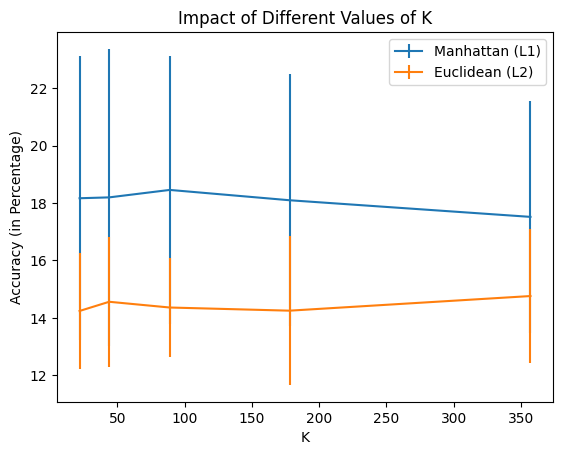

In [10]:
plt.figure()
plt.errorbar(k_values, L1_acc[0], L1_acc[1])
plt.errorbar(k_values, L2_acc[0], L2_acc[1])
plt.legend(['Manhattan (L1)','Euclidean (L2)'])
plt.xlabel('K')
plt.ylabel('Accuracy (in Percentage)')
plt.title('Impact of Different Values of K')

plt.show()